In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [2]:
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="niranjang8191",
    database="phone",
    auth_plugin="mysql_native_password"

)
mycursor=db.cursor()
print(db)

In [3]:
mycursor.execute("select * from phones_data")
output=mycursor.fetchall()
for x in output:
    print(x)

(1, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 128, 'Super Retina XDR Display', 12, 48, 'USA', 'pink', 3367, 15, 69999, 3)
(2, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 128, 'Super Retina XDR Display', 12, 48, 'USA', 'yellow', 3367, 15, 14999, 0)
(3, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 128, 'Super Retina XDR Display', 12, 48, 'USA', 'green', 3367, 15, 15999, 1)
(4, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 128, 'Super Retina XDR Display', 12, 48, 'USA', 'blue', 3367, 15, 49999, 2)
(5, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 128, 'Super Retina XDR Display', 12, 48, 'USA', 'black', 3367, 15, 69999, 3)
(6, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 256, 'Super Retina XDR Display', 12, 48, 'USA', 'pink', 3367, 15, 79999, 3)
(7, 'iphone', 'iPhone 15', 'ios', 'A16 Bionic Chip, 6 Core ', 6, 256, 'Super Retina XDR Display', 12, 48, 'USA', 'yellow', 3367, 15, 79999, 3)
(8, 'ip

In [4]:
query="select * from phones_data"
data=pd.read_sql(query,db)

/var/folders/g9/01xw9sf55fbg7wx6rnn2dsc40000gn/T/ipykernel_3186/3834954658.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query,db)


In [5]:
data.head()

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,1,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,pink,3367.0,15.0,69999.0,3
1,2,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,yellow,3367.0,15.0,14999.0,0
2,3,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,green,3367.0,15.0,15999.0,1
3,4,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,blue,3367.0,15.0,49999.0,2
4,5,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,black,3367.0,15.0,69999.0,3


In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2233 non-null   int64  
 1   phone_name               2233 non-null   object 
 2   model_type               2233 non-null   object 
 3   android_or_ios           2233 non-null   object 
 4   processor_type           2229 non-null   object 
 5   RAM_in_GB                2228 non-null   float64
 6   ROM_in_GB                2230 non-null   float64
 7   Display                  2222 non-null   object 
 8   front_cam_in_MP          2216 non-null   float64
 9   Back_cam_in_MP           2229 non-null   float64
 10  manufactur_country       2233 non-null   object 
 11  colour                   2233 non-null   object 
 12  battery_capacity_in_mAh  2229 non-null   float64
 13  charger_volt_in_Watts    2210 non-null   float64
 14  cost                    

In [8]:
data.describe()

,id,RAM_in_GB,ROM_in_GB,front_cam_in_MP,Back_cam_in_MP,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
count,2233.000000,2228.000000,2230.000000,2216.000000,2229.000000,2229.000000,2210.000000,2228.000000,2233.000000
mean,1117.000000,6.757181,176.107623,16.748646,41.528488,4281.390310,36.040271,36693.935368,1.497089
std,644.755897,4.094727,172.907709,12.087062,33.963198,1044.528925,36.089405,36517.483654,1.123676
min,1.000000,1.000000,4.000000,1.000000,2.000000,290.000000,5.000000,2999.000000,0.000000
25%,559.000000,4.000000,64.000000,8.000000,12.000000,3400.000000,10.000000,12999.000000,1.000000
50%,1117.000000,6.000000,128.000000,13.000000,48.000000,4500.000000,18.000000,23999.000000,1.000000
75%,1675.000000,8.000000,256.000000,20.000000,50.000000,5000.000000,45.000000,42999.000000,3.000000
max,2233.000000,16.000000,1024.000000,64.000000,200.000000,10000.000000,150.000000,193500.000000,3.000000


In [9]:
data.isna().sum()

id                          0
phone_name                  0
model_type                  0
android_or_ios              0
processor_type              4
RAM_in_GB                   5
ROM_in_GB                   3
Display                    11
front_cam_in_MP            17
Back_cam_in_MP              4
manufactur_country          0
colour                      0
battery_capacity_in_mAh     4
charger_volt_in_Watts      23
cost                        5
segments                    0
dtype: int64

In [10]:
data1=data[data['processor_type'].notna()]
data1

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,1,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,pink,3367.0,15.0,69999.0,3
1,2,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,yellow,3367.0,15.0,14999.0,0
2,3,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,green,3367.0,15.0,15999.0,1
3,4,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,blue,3367.0,15.0,49999.0,2
4,5,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,black,3367.0,15.0,69999.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2229,LG,LG K50,android,Mediatek MT6762 Helio P22,3.0,32.0,IPS LCD,13.0,13.0,South Korea,Aurora Black,3500.0,10.0,14990.0,1
2229,2230,LG,LG W10 Alpha,android,Spreadtrum SC9863A,3.0,32.0,IPS LCD,8.0,13.0,South Korea,Black,3450.0,10.0,10990.0,0
2230,2231,LG,LG V50S ThinQ 5G,android,Qualcomm SM8150 Snapdragon 855,8.0,256.0,P-OLED,32.0,12.0,South Korea,Aurora Black,4000.0,25.0,69990.0,3
2231,2232,LG,LG K41S,android,Mediatek MT6762 Helio P22,3.0,32.0,IPS LCD,8.0,13.0,South Korea,Gray,4000.0,10.0,10990.0,0


In [11]:
p=data1[data1.isna().any(axis=1)]
p

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
270,271,SAMSUNG,Galaxy F34 5G,android,Exynos 1280,8.0,1024.0,Full HD+ Super AMOLED,13.0,50.0,india,Mystic Green,6000.0,NaN,14999.0,0
275,276,SAMSUNG,Galaxy F34 5G,android,Exynos,4.0,64.0,None,NaN,50.0,India,Graphite Black,6000.0,25.0,14119.0,0
276,277,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,64.0,None,NaN,50.0,India,Arctic Blue,6000.0,25.0,8946.0,0
277,278,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,128.0,None,NaN,50.0,India,Berry Blue,6000.0,25.0,13499.0,0
278,279,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,128.0,None,NaN,50.0,India,ICY Silver,6000.0,25.0,11495.0,0
279,280,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,64.0,None,NaN,50.0,India,Sapphire Blue,6000.0,25.0,8393.0,0
280,281,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,6.0,128.0,None,NaN,50.0,India,Berry Blue,6000.0,25.0,13999.0,0
281,282,SAMSUNG,Galaxy F15 5G,android,MediaTek Dimensity 6100+,4.0,128.0,Super AMOLED,13.0,50.0,India,Groovy Violet,6000.0,NaN,12999.0,0
344,345,Motorola,G32,android,Qualcomm Snapdragon 680,8.0,128.0,Full HD+ IPS LCD Display,16.0,50.0,India,Satin Maroon,5000.0,NaN,10999.0,0
345,346,Motorola,G32,android,Qualcomm Snapdragon 680,8.0,128.0,Full HD+ IPS LCD Display,16.0,50.0,India,Mineral Gray,5000.0,NaN,10999.0,0


In [12]:
#replacing mean values in RAM_in_GB
mean_ram=data1['RAM_in_GB'].mean()
#data1['RAM_in_GB']=data1['RAM_in_GB'].fillna(mean_ram)
data1.loc[data1['RAM_in_GB'].isna(), 'RAM_in_GB'] = mean_ram

In [13]:
q=data1[data1['RAM_in_GB'].isna()]
q

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments


In [14]:
rom=data1[data1['ROM_in_GB'].isna()]
rom

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
411,412,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.0,NaN,Full HD+ AMOLED,50.0,NaN,India,Classic Black,5000.0,80.0,NaN,2
422,423,oppo,K12x 5G,android,Dimensity 6300,6.0,NaN,LCD,8.0,32.0,India,Midnight Voilet,5100.0,45.0,NaN,0
433,434,oppo,A3x 5G,android,Dimensity 6300,4.0,NaN,HD+ LCD,5.0,8.0,India,Starry Purple,5100.0,NaN,12499.0,0


In [15]:
#replacing mean values in ROM_in_GB
rom_mean=data1['ROM_in_GB'].mean()
data1.loc[data1['ROM_in_GB'].isna(), 'ROM_in_GB']=rom_mean

In [16]:
display=data1[data1['Display'].isna()]
display

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
275,276,SAMSUNG,Galaxy F34 5G,android,Exynos,4.0,64.0,None,NaN,50.0,India,Graphite Black,6000.0,25.0,14119.0,0
276,277,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,64.0,None,NaN,50.0,India,Arctic Blue,6000.0,25.0,8946.0,0
277,278,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,128.0,None,NaN,50.0,India,Berry Blue,6000.0,25.0,13499.0,0
278,279,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,128.0,None,NaN,50.0,India,ICY Silver,6000.0,25.0,11495.0,0
279,280,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,4.0,64.0,None,NaN,50.0,India,Sapphire Blue,6000.0,25.0,8393.0,0
280,281,SAMSUNG,Galaxy M14 4G,android,Exynos Octa Core,6.0,128.0,None,NaN,50.0,India,Berry Blue,6000.0,25.0,13999.0,0
440,441,oppo,A77,android,Mediatek Helio G35,4.0,128.0,None,8.0,50.0,India,Sunset Orange,5000.0,33.0,11999.0,0


In [17]:
data1=data1[data1['Display'].notna()]

In [18]:
front_cam=data1.loc[data1['front_cam_in_MP'].isna()]
front_cam

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
408,409,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.000000,128.0,Full HD+ AMOLED,NaN,50.0,India,Classic Black,5000.0,80.0,NaN,2
413,414,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.000000,256.0,Full HD+ AMOLED,NaN,50.0,India,Peacock Green,5000.0,80.0,33380.0,2
416,417,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,12.000000,256.0,Full HD+ AMOLED,NaN,50.0,India,Peacock Green,5000.0,80.0,34899.0,2
418,419,vivo,V30e,android,Snapdragon 6 Gen 1,8.000000,128.0,Full HD+ AMOLED,NaN,50.0,India,Velvet Red,5500.0,80.0,NaN,2
428,429,oppo,Reno 12 Pro 5G,android,Dimensity 7300,6.756745,256.0,Flexible AMOLED,NaN,50.0,India,Sunset Gold,5000.0,NaN,36999.0,2
432,433,oppo,A3x 5G,android,Dimensity 6300,4.000000,64.0,HD+ LCD,NaN,8.0,India,Sparkle Black,5100.0,NaN,12499.0,0
438,439,oppo,Reno 12 5G,android,Dimensity 7300,8.000000,256.0,3D Flexible Curved AMOLED,NaN,50.0,India,"Astro Silver,",5000.0,68.0,32999.0,2


In [19]:
#replacing meadian values in front_cam_in_MP
front_median=data1['front_cam_in_MP'].median()
data1.loc[data1['front_cam_in_MP'].isna(), 'front_cam_in_MP']=front_median

In [20]:
#null values in Back_cam_in_MP
Back_cam=data1[data1['Back_cam_in_MP'].isna()]
Back_cam

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
411,412,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.0,176.19407,Full HD+ AMOLED,50.0,NaN,India,Classic Black,5000.0,80.0,NaN,2
415,416,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,12.0,256.00000,Full HD+ AMOLED,50.0,NaN,India,Andaman Blue,5000.0,80.0,34899.0,2
430,431,oppo,Reno 12 Pro 5G,android,Dimensity 7300,12.0,512.00000,Flexible AMOLED,50.0,NaN,India,Sunset Gold,5000.0,NaN,40999.0,2
436,437,oppo,A3x 5G,android,Dimensity 6300,4.0,128.00000,HD+ LCD,5.0,NaN,India,Starry Purple,5100.0,NaN,13499.0,0


In [21]:
#replacing mean values to Back_cam_in_MP
Back_cam_mean=data1['Back_cam_in_MP'].mean()
data1.loc[data1['Back_cam_in_MP'].isna(), 'Back_cam_in_MP']=Back_cam_mean

In [22]:
battery_capacity=data1[data1['battery_capacity_in_mAh'].isna()]
battery_capacity

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
409,410,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,6.756745,128.0,Full HD+ AMOLED,50.0,50.0,India,Andaman Blue,NaN,80.0,31999.0,2
414,415,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,12.000000,256.0,Full HD+ AMOLED,50.0,50.0,India,Classic Black,NaN,80.0,34899.0,2
421,422,oppo,K12x 5G,android,Dimensity 6300,6.000000,128.0,LCD,8.0,32.0,India,Breeze Blue,NaN,45.0,12999.0,0
437,438,oppo,Reno 12 5G,android,Dimensity 7300,6.756745,256.0,3D Flexible Curved AMOLED,32.0,50.0,India,Matte Brown,NaN,68.0,32999.0,2


In [23]:
#median of battery_capacity_in_mAh
median_battery_capacity=data1['battery_capacity_in_mAh'].median()
data1.loc[data1['battery_capacity_in_mAh'].isna(),'battery_capacity_in_mAh']=median_battery_capacity

In [24]:
#charger_volt_in_Watts
charger_volt=data1[data1['charger_volt_in_Watts'].isna()]
charger_volt

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
270,271,SAMSUNG,Galaxy F34 5G,android,Exynos 1280,8.000000,1024.00000,Full HD+ Super AMOLED,13.0,50.000000,india,Mystic Green,6000.0,NaN,14999.0,0
281,282,SAMSUNG,Galaxy F15 5G,android,MediaTek Dimensity 6100+,4.000000,128.00000,Super AMOLED,13.0,50.000000,India,Groovy Violet,6000.0,NaN,12999.0,0
344,345,Motorola,G32,android,Qualcomm Snapdragon 680,8.000000,128.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Satin Maroon,5000.0,NaN,10999.0,0
345,346,Motorola,G32,android,Qualcomm Snapdragon 680,8.000000,128.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Mineral Gray,5000.0,NaN,10999.0,0
346,347,Motorola,G32,android,Qualcomm Snapdragon 680,8.000000,128.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Rose Gold,5000.0,NaN,10999.0,0
347,348,Motorola,G32,android,Qualcomm Snapdragon 680,4.000000,64.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Satin Maroon,5000.0,NaN,10999.0,0
348,349,Motorola,G32,android,Qualcomm Snapdragon 680,4.000000,64.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Mineral Gray,5000.0,NaN,10999.0,0
349,350,Motorola,G32,android,Qualcomm Snapdragon 680,4.000000,64.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Rose Gold,5000.0,NaN,10999.0,0
350,351,Motorola,G32,android,Qualcomm Snapdragon 680,4.000000,64.00000,Full HD+ IPS LCD Display,16.0,50.000000,India,Satin Silver,5000.0,NaN,10999.0,0
424,425,oppo,K12x 5G,android,Dimensity 6300,8.000000,256.00000,LCD,8.0,32.000000,India,Midnight Voilet,5100.0,NaN,15999.0,1


In [25]:
#mean of charger_volt_in_Watts
mean_charger_volt=data1['charger_volt_in_Watts'].mean()
data1.loc[data1['charger_volt_in_Watts'].isna(),'charger_volt_in_Watts']=mean_charger_volt

In [26]:
#cost null values
cost=data1[data1['cost'].isna()]
cost

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
408,409,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.0,128.00000,Full HD+ AMOLED,13.0,50.000000,India,Classic Black,5000.0,80.00000,NaN,2
411,412,vivo,V30 5G,android,\nSnapdragon 7 Gen 3,8.0,176.19407,Full HD+ AMOLED,50.0,41.486474,India,Classic Black,5000.0,80.00000,NaN,2
418,419,vivo,V30e,android,Snapdragon 6 Gen 1,8.0,128.00000,Full HD+ AMOLED,13.0,50.000000,India,Velvet Red,5500.0,80.00000,NaN,2
422,423,oppo,K12x 5G,android,Dimensity 6300,6.0,176.19407,LCD,8.0,32.000000,India,Midnight Voilet,5100.0,45.00000,NaN,0
429,430,oppo,Reno 12 Pro 5G,android,Dimensity 7300,12.0,512.00000,Flexible AMOLED,50.0,50.000000,India,Space Brown,5000.0,36.09186,NaN,2


In [27]:
#median of cost
median_cost=data1['cost'].median()
data1.loc[data1['cost'].isnull(),'cost']=median_cost

In [28]:
data1.isna().sum()

id                         0
phone_name                 0
model_type                 0
android_or_ios             0
processor_type             0
RAM_in_GB                  0
ROM_in_GB                  0
Display                    0
front_cam_in_MP            0
Back_cam_in_MP             0
manufactur_country         0
colour                     0
battery_capacity_in_mAh    0
charger_volt_in_Watts      0
cost                       0
segments                   0
dtype: int64

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 2232
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2222 non-null   int64  
 1   phone_name               2222 non-null   object 
 2   model_type               2222 non-null   object 
 3   android_or_ios           2222 non-null   object 
 4   processor_type           2222 non-null   object 
 5   RAM_in_GB                2222 non-null   float64
 6   ROM_in_GB                2222 non-null   float64
 7   Display                  2222 non-null   object 
 8   front_cam_in_MP          2222 non-null   float64
 9   Back_cam_in_MP           2222 non-null   float64
 10  manufactur_country       2222 non-null   object 
 11  colour                   2222 non-null   object 
 12  battery_capacity_in_mAh  2222 non-null   float64
 13  charger_volt_in_Watts    2222 non-null   float64
 14  cost                     2222

In [30]:
data1.head()

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,1,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,pink,3367.0,15.0,69999.0,3
1,2,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,yellow,3367.0,15.0,14999.0,0
2,3,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,green,3367.0,15.0,15999.0,1
3,4,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,blue,3367.0,15.0,49999.0,2
4,5,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,black,3367.0,15.0,69999.0,3


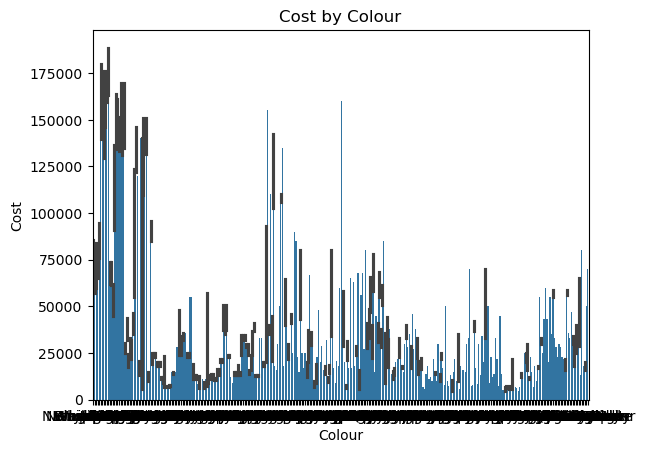

In [31]:
#Cost by Colour
plt.figure()
sns.barplot(x='colour', y='cost', data=data1)
plt.title('Cost by Colour')
plt.xlabel('Colour')
plt.ylabel('Cost')
plt.show()

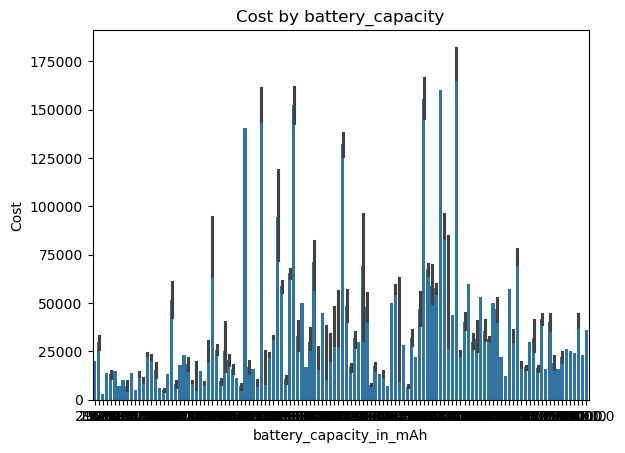

In [32]:
#Cost by battery_capacity
plt.figure()
sns.barplot(x='battery_capacity_in_mAh', y='cost', data=data1)
plt.title('Cost by battery_capacity')
plt.xlabel('battery_capacity_in_mAh')
plt.ylabel('Cost')
plt.show()

Text(0, 0.5, 'Cost')

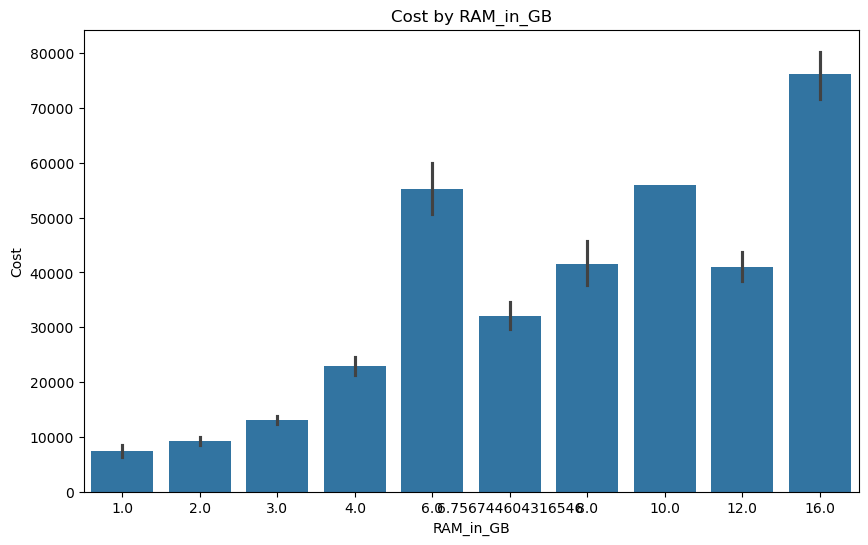

In [33]:
#Cost by RAM_in_GB
plt.figure(figsize=(10,6))
sns.barplot(x='RAM_in_GB', y='cost', data=data1)
plt.title('Cost by RAM_in_GB')
plt.xlabel('RAM_in_GB')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

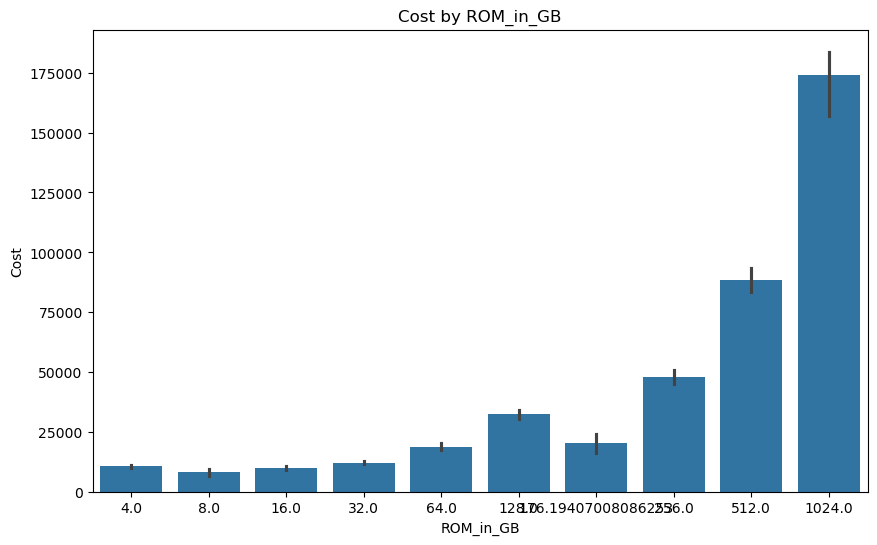

In [34]:
#Cost by ROM_in_GB
plt.figure(figsize=(10,6))
sns.barplot(x='ROM_in_GB', y='cost', data=data1)
plt.title('Cost by ROM_in_GB')
plt.xlabel('ROM_in_GB')
plt.ylabel('Cost')

In [35]:
#costliest phone
#data1['cost'].max()
maxx=0
for i in data1['cost']:
    if i>maxx:
        maxx=i
print(data1[data1['cost']==maxx])

    id phone_name         model_type android_or_ios         processor_type  \
38  39     iphone  iPhone 15 Pro Max            ios  A17 Pro Chip, 6 Core    
39  40     iphone  iPhone 15 Pro Max            ios  A17 Pro Chip, 6 Core    
40  41     iphone  iPhone 15 Pro Max            ios  A17 Pro Chip, 6 Core    
41  42     iphone  iPhone 15 Pro Max            ios  A17 Pro Chip, 6 Core    

    RAM_in_GB  ROM_in_GB                   Display  front_cam_in_MP  \
38        8.0     1024.0  Super Retina XDR Display             12.0   
39        8.0     1024.0  Super Retina XDR Display             12.0   
40        8.0     1024.0  Super Retina XDR Display             12.0   
41        8.0     1024.0  Super Retina XDR Display             12.0   

    Back_cam_in_MP manufactur_country            colour  \
38            48.0                USA  Natural Titanium   
39            48.0                USA     Blue Titanium   
40            48.0                USA    White Titanium   
41            48.

In [36]:
#low cost phone
minn=100000
for i in data1['cost']:
    if i<minn:
        minn=i
print(data1[data1['cost']==minn])

        id phone_name         model_type android_or_ios  \
1803  1804   MICROMAX  Micromax Bharat 2        android   
1817  1818   MICROMAX  Micromax Bharat 1        android   
1840  1841   MICROMAX  Micromax Bharat 2        android   
1853  1854   MICROMAX  Micromax Bharat 1        android   
1864  1865   MICROMAX  Micromax Bharat 2        android   

               processor_type  RAM_in_GB  ROM_in_GB Display  front_cam_in_MP  \
1803        Spreadtrum SC9832        1.0        8.0     TFT              2.0   
1817  Qualcomm Snapdragon 205        1.0        8.0     TFT              2.0   
1840        Spreadtrum SC9832        1.0        8.0     TFT              2.0   
1853  Qualcomm Snapdragon 205        1.0        8.0     TFT              2.0   
1864        Spreadtrum SC9832        1.0        8.0     TFT              2.0   

      Back_cam_in_MP manufactur_country colour  battery_capacity_in_mAh  \
1803             5.0              India  Black                   1300.0   
1817          

In [37]:
#printing only the name
minn=100000
for i in data1['cost']:
    if i<minn:
        minn=i
print(data1[data1['cost']==minn]['phone_name'])

1803    MICROMAX
1817    MICROMAX
1840    MICROMAX
1853    MICROMAX
1864    MICROMAX
Name: phone_name, dtype: object


In [38]:
data1['Back_cam_in_MP'].max()

200.0

In [39]:
#best camera under 15000
cost15000 = data1[data1['cost'] < 15000]
max_back_cam = cost15000.loc[cost15000['Back_cam_in_MP'].idxmax()]

print(max_back_cam)

id                                     670
phone_name                            Poco
model_type                         X3 Lite
android_or_ios                     android
processor_type             Snapdragon 732G
RAM_in_GB                              6.0
ROM_in_GB                             64.0
Display                            IPS LCD
front_cam_in_MP                       20.0
Back_cam_in_MP                        64.0
manufactur_country                   India
colour                         Shadow Gray
battery_capacity_in_mAh             6000.0
charger_volt_in_Watts                 33.0
cost                               13999.0
segments                                 0
Name: 669, dtype: object


In [40]:
#best camera under 25000
cost15000 = data1[data1['cost']<25000]
max_back_cam = cost15000.loc[cost15000['Back_cam_in_MP'].idxmax()]

print(max_back_cam)

id                                       717
phone_name                              Poco
model_type                        X4 Pro Max
android_or_ios                       android
processor_type             Snapdragon 695 5G
RAM_in_GB                                8.0
ROM_in_GB                              128.0
Display                               AMOLED
front_cam_in_MP                         16.0
Back_cam_in_MP                         108.0
manufactur_country                     India
colour                                 Black
battery_capacity_in_mAh               5000.0
charger_volt_in_Watts                   67.0
cost                                 22999.0
segments                                   1
Name: 716, dtype: object


In [41]:
#best camera under 200000
cost15000 = data1[data1['cost'] < 200000]
max_back_cam = cost15000.loc[cost15000['Back_cam_in_MP'].idxmax()]

print(max_back_cam)

id                                            1350
phone_name                                      Mi
model_type                      Redmi Note 12 Pro+
android_or_ios                             android
processor_type             MediaTek Dimensity 1080
RAM_in_GB                                      8.0
ROM_in_GB                                    128.0
Display                                     AMOLED
front_cam_in_MP                               16.0
Back_cam_in_MP                               200.0
manufactur_country                           China
colour                                 Polar Black
battery_capacity_in_mAh                     5000.0
charger_volt_in_Watts                        120.0
cost                                       32999.0
segments                                         3
Name: 1349, dtype: object


In [42]:
#phones data based on colour
class user:
    def phone_clour(x):
        colour_data=data1[data1['colour'].str.lower()==x.lower()]
        if colour_data.empty:
            print(f"No phones are available with the colour {x}")
        else:
            print(colour_data[['phone_name','model_type','RAM_in_GB','RAM_in_GB','cost']])
    x=input("enter the colour:")
    phone_clour(x)

enter the colour: red


     phone_name             model_type  RAM_in_GB  RAM_in_GB     cost
60       iphone              iPhone 14        6.0        6.0  69999.0
66       iphone              iPhone 14        6.0        6.0  57999.0
72       iphone              iPhone 14        6.0        6.0  67999.0
78       iphone         iPhone 14 plus        6.0        6.0  58999.0
84       iphone         iPhone 14 plus        6.0        6.0  69999.0
...         ...                    ...        ...        ...      ...
2109  Panasonic  Panasonic Eluga Ray X        3.0        3.0  12999.0
2111        HTC           HTC U12 Plus        6.0        6.0  54990.0
2126        HTC         HTC Desire 830        3.0        3.0  22990.0
2150        HTC         HTC Desire 12s        3.0        3.0  15999.0
2174        HTC               HTC U12+        6.0        6.0  64990.0

[233 rows x 5 columns]


In [43]:
#good battery phones
def good_battery(x):
    battery=data1[data1['battery_capacity_in_mAh']>=x]
    if battery.empty:
        print(f"no phones found of {x}mAh")
    else:
        print(battery[['phone_name','model_type','RAM_in_GB','RAM_in_GB','cost']])

x=int(input())
good_battery(x)

 5000


     phone_name               model_type  RAM_in_GB  RAM_in_GB     cost
270     SAMSUNG            Galaxy F34 5G        8.0        8.0  14999.0
281    SAMSUNG             Galaxy F15 5G        4.0        4.0  12999.0
283    Motorola           Edge 50 Fusion        8.0        8.0  22999.0
284    Motorola          Edge 50 Fusion         8.0        8.0  22999.0
285    Motorola          Edge 50 Fusion         8.0        8.0  22999.0
...         ...                      ...        ...        ...      ...
2093  Panasonic  Panasonic Eluga Ray 700        3.0        3.0  11999.0
2100  Panasonic  Panasonic Eluga Ray 700        3.0        3.0  10999.0
2105  Panasonic  Panasonic Eluga Ray 700        3.0        3.0  11999.0
2113        HTC        HTC Desire 20 Pro        6.0        6.0  21990.0
2212         LG          LG V60 ThinQ 5G        8.0        8.0  79990.0

[906 rows x 5 columns]


In [44]:
data1.head()

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,1,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,pink,3367.0,15.0,69999.0,3
1,2,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,yellow,3367.0,15.0,14999.0,0
2,3,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,green,3367.0,15.0,15999.0,1
3,4,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,blue,3367.0,15.0,49999.0,2
4,5,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,black,3367.0,15.0,69999.0,3


In [45]:
#fast charging phones
def fast_charg():
    charg=data1[data1['charger_volt_in_Watts']>=50]
    print(charg[['phone_name','model_type','RAM_in_GB','RAM_in_GB','cost']])

fast_charg()

     phone_name        model_type  RAM_in_GB  RAM_in_GB     cost
283    Motorola    Edge 50 Fusion        8.0        8.0  22999.0
284    Motorola   Edge 50 Fusion         8.0        8.0  22999.0
285    Motorola   Edge 50 Fusion         8.0        8.0  22999.0
286    Motorola   Edge 50 Fusion        12.0       12.0  24999.0
287    Motorola   Edge 50 Fusion        12.0       12.0  24999.0
...         ...               ...        ...        ...      ...
1983      Honor      Honor X40 GT       12.0       12.0  44999.0
1990      Honor      Honor X20 5G        8.0        8.0  29999.0
2000      Honor     Honor X20 Pro       12.0       12.0  39999.0
2002      Honor  Honor X30 Pro 5G       12.0       12.0  44999.0
2018      Honor     Honor V40 8GB        8.0        8.0  31999.0

[549 rows x 5 columns]


In [46]:
#phones data based on country
class user:
    def country(x):
        country_data=data1[data1['manufactur_country'].str.lower()==x.lower()]
        if country_data.empty:
            print(f"phones made in country {x} data is not available! our apologies🥲")
        else:
            print(country_data[['phone_name','model_type','RAM_in_GB','RAM_in_GB','cost']])
            
    x=input("enter the country name:")
    country(x)

enter the country name: india


     phone_name                 model_type  RAM_in_GB  RAM_in_GB     cost
270     SAMSUNG              Galaxy F34 5G        8.0        8.0  14999.0
281    SAMSUNG               Galaxy F15 5G        4.0        4.0  12999.0
282     SAMSUNG              Galaxy S23 5G        8.0        8.0  95999.0
283    Motorola             Edge 50 Fusion        8.0        8.0  22999.0
284    Motorola            Edge 50 Fusion         8.0        8.0  22999.0
...         ...                        ...        ...        ...      ...
1861   MICROMAX     Micromax Canvas 2 Plus        3.0        3.0   7999.0
1862   MICROMAX     Micromax Canvas 4 Plus        2.0        2.0   7499.0
1863   MICROMAX    Micromax Canvas Fire 4G        2.0        2.0   5999.0
1864   MICROMAX          Micromax Bharat 2        1.0        1.0   2999.0
1865   MICROMAX  Micromax Canvas Xpress 4G        2.0        2.0   7499.0

[767 rows x 5 columns]


In [47]:
#cost based top 10 phones colour
#print("iphone colour rose gold")
top_10_colours=data1.groupby('colour')['cost'].sum().sort_values(ascending=False)
print(top_10_colours) 

colour
Black              9504522.0
Red                6975560.0
Blue               6635024.0
Silver             5352906.0
White              3993286.0
                     ...    
Platinum Silver       5999.0
Amber Red             5999.0
Gradation Black       5999.0
Fiery Red             4999.0
Gradient Blue         4699.0
Name: cost, Length: 328, dtype: float64


In [48]:
data1.head()

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,1,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,pink,3367.0,15.0,69999.0,3
1,2,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,yellow,3367.0,15.0,14999.0,0
2,3,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,green,3367.0,15.0,15999.0,1
3,4,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,blue,3367.0,15.0,49999.0,2
4,5,iphone,iPhone 15,ios,"A16 Bionic Chip, 6 Core",6.0,128.0,Super Retina XDR Display,12.0,48.0,USA,black,3367.0,15.0,69999.0,3


In [49]:
data1.tail()

,id,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
2228,2229,LG,LG K50,android,Mediatek MT6762 Helio P22,3.0,32.0,IPS LCD,13.0,13.0,South Korea,Aurora Black,3500.0,10.0,14990.0,1
2229,2230,LG,LG W10 Alpha,android,Spreadtrum SC9863A,3.0,32.0,IPS LCD,8.0,13.0,South Korea,Black,3450.0,10.0,10990.0,0
2230,2231,LG,LG V50S ThinQ 5G,android,Qualcomm SM8150 Snapdragon 855,8.0,256.0,P-OLED,32.0,12.0,South Korea,Aurora Black,4000.0,25.0,69990.0,3
2231,2232,LG,LG K41S,android,Mediatek MT6762 Helio P22,3.0,32.0,IPS LCD,8.0,13.0,South Korea,Gray,4000.0,10.0,10990.0,0
2232,2233,LG,LG W30,android,Mediatek MT6762 Helio P22,3.0,32.0,IPS LCD,8.0,12.0,South Korea,Blue,4000.0,10.0,12990.0,1


In [50]:
new_data=data1.drop(columns='id')

In [51]:
new_data['phone_name'].unique()

array(['iphone', 'SAMSUNG', 'SAMSUNG ', 'Motorola', 'vivo', 'oppo',
       'Samsung', 'Google', 'Poco', 'Realme', 'Redmi', 'Lava', 'Mi',
       'Itel', 'Nokia', 'iQOO', 'OnePlus', 'ASUS', 'MICROMAX', 'Lenovo',
       'Honor', 'Panasonic', 'HTC', 'LG'], dtype=object)

In [52]:
new_data['model_type'].nunique()

1471

In [53]:
new_data['android_or_ios'].unique()

array(['ios', 'android'], dtype=object)

In [54]:
new_data['processor_type'].nunique()

292

In [55]:
new_data['Display'].nunique()

49

In [56]:
new_data['manufactur_country'].unique()

array(['USA', 'india', 'India', 'South Korea', 'Vietnam', 'China',
       'Finland', 'Taiwan', 'Japan'], dtype=object)

In [57]:
new_data['colour'].nunique()

328

In [58]:
columns_to_label_encode = ['phone_name', 'android_or_ios', 'Display','manufactur_country']

label_encoders = {}  # Dictionary to store encoders for each column
for col in columns_to_label_encode:
    encoder = LabelEncoder()
    new_data[col] = encoder.fit_transform(new_data[col])
    label_encoders[col] = encoder  # Save encoder for inverse transformation if needed

In [59]:
#frequency encoding
new_data['model_type'] = new_data['model_type'].map(new_data['model_type'].value_counts())
new_data['processor_type'] = new_data['processor_type'].map(new_data['processor_type'].value_counts())
new_data['colour'] = new_data['colour'].map(new_data['colour'].value_counts())

In [60]:
new_data

,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,69999.0,3
1,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,14999.0,0
2,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,15999.0,1
3,21,15,1,30,6.0,128.0,43,12.0,48.0,6,18,3367.0,15.0,49999.0,2
4,21,15,1,30,6.0,128.0,43,12.0,48.0,6,6,3367.0,15.0,69999.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,5,1,0,7,3.0,32.0,23,13.0,13.0,4,4,3500.0,10.0,14990.0,1
2229,5,1,0,1,3.0,32.0,23,8.0,13.0,4,344,3450.0,10.0,10990.0,0
2230,5,1,0,3,8.0,256.0,29,32.0,12.0,4,4,4000.0,25.0,69990.0,3
2231,5,1,0,7,3.0,32.0,23,8.0,13.0,4,63,4000.0,10.0,10990.0,0


In [61]:
'''scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=new_data.columns)

new_data.update(scaled_df)
'''

'scaler = StandardScaler()\nscaled_data = scaler.fit_transform(new_data)\n\n# Convert scaled data back to a DataFrame\nscaled_df = pd.DataFrame(scaled_data, columns=new_data.columns)\n\nnew_data.update(scaled_df)\n'

In [62]:
new_data

,phone_name,model_type,android_or_ios,processor_type,RAM_in_GB,ROM_in_GB,Display,front_cam_in_MP,Back_cam_in_MP,manufactur_country,colour,battery_capacity_in_mAh,charger_volt_in_Watts,cost,segments
0,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,69999.0,3
1,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,14999.0,0
2,21,15,1,30,6.0,128.0,43,12.0,48.0,6,12,3367.0,15.0,15999.0,1
3,21,15,1,30,6.0,128.0,43,12.0,48.0,6,18,3367.0,15.0,49999.0,2
4,21,15,1,30,6.0,128.0,43,12.0,48.0,6,6,3367.0,15.0,69999.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,5,1,0,7,3.0,32.0,23,13.0,13.0,4,4,3500.0,10.0,14990.0,1
2229,5,1,0,1,3.0,32.0,23,8.0,13.0,4,344,3450.0,10.0,10990.0,0
2230,5,1,0,3,8.0,256.0,29,32.0,12.0,4,4,4000.0,25.0,69990.0,3
2231,5,1,0,7,3.0,32.0,23,8.0,13.0,4,63,4000.0,10.0,10990.0,0


In [63]:
x=new_data.drop(columns={'segments'})
y=new_data['segments']

In [64]:
print(x.shape)
print(y.shape)

(2222, 14)
(2222,)


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1777, 14)
(445, 14)
(1777,)
(445,)


In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [67]:
lin_pred = model.predict(x_test)
mse = mean_squared_error(y_test, lin_pred)
r2 = r2_score(y_test, lin_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.3627078825973163
R^2 Score: 0.7037230806459145


In [68]:
from sklearn.naive_bayes import GaussianNB
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

GaussianNB()

In [139]:
bays_pred = Bayes_model.predict(x_test)

bays_accuracy = accuracy_score(y_test, bays_pred)
print(f'Accuracy Score: {bays_accuracy:.4f}')
print(classification_report(y_test, bays_pred))
print(confusion_matrix(y_test, bays_pred))

Accuracy Score: 0.7011
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       113
           1       0.58      0.57      0.58       115
           2       0.70      0.59      0.64       113
           3       0.89      0.83      0.86       104

    accuracy                           0.70       445
   macro avg       0.71      0.70      0.70       445
weighted avg       0.71      0.70      0.70       445

[[93 20  0  0]
 [37 66 12  0]
 [ 8 27 67 11]
 [ 0  1 17 86]]
